# Results of the pipeline

919


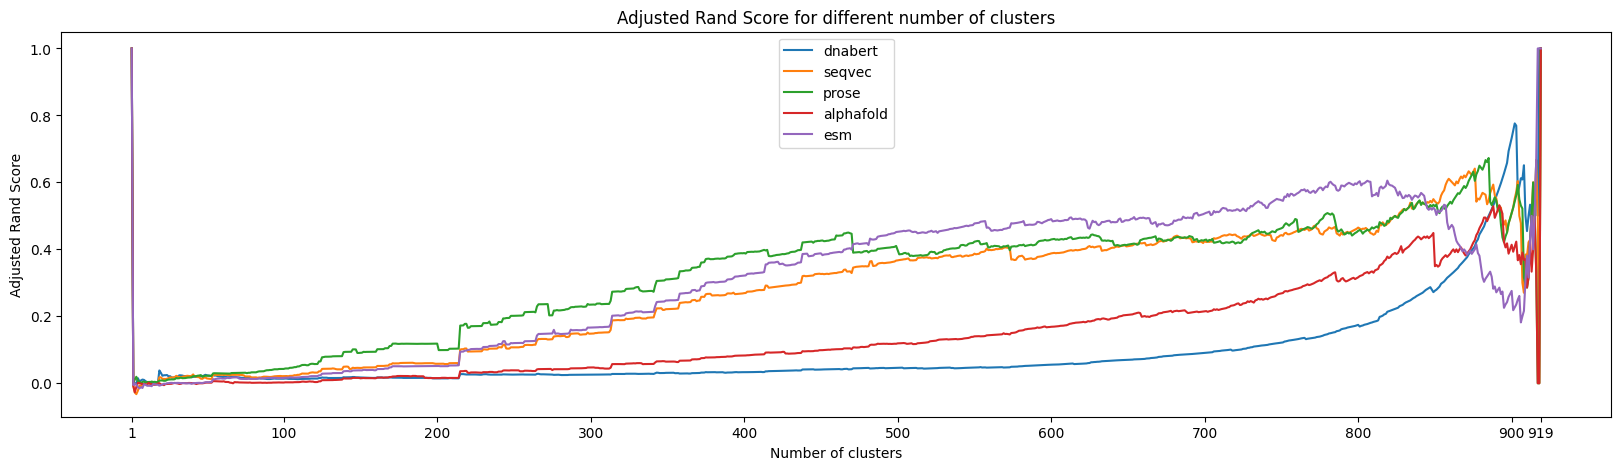

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.196919  0.329940  0.349061   0.170253  0.255178
         50               0.232536  0.377085  0.350101   0.277174  0.392085
         all              0.232536  0.410146  0.350205   0.278704  0.440896
average  10               0.037654  0.310476  0.320442   0.200091  0.290588
         50               0.052678  0.456574  0.329355   0.255270  0.477182
         all              0.046874  0.477704  0.329767   0.252267  0.542349
sum      10               0.197893  0.255000  0.327679   0.261897  0.253112
         50               0.185246  0.270845  0.344494   0.316954  0.315339
         all              0.181747  0.278154  0.344580   0.313954  0.360192
max      10               0.022118  0.239710  0.381265   0.121609  0.364902
         50               0.079903  0.394451  0.450298   0.311138  0.517738
         all              0.103927  0.392423  0.492356   0.365587  0.555543

In [25]:
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_mouse.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="ward", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fix, _ = plt.subplots(figsize=(20, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['average']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend()
plt.show()
r
# plt.savefig(Path(PATH).stem + '.eps')
